In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle

### Выгрузка данных и первичное EDA

In [ ]:
#чтение данных и первичный просмотр их
def func_info(data):
    display(data.head())
    display(data.info())
    display(data.describe())
    #display(data.hist(figsize=(8,8)))

data = pd.read_excel(r'/content/drive/MyDrive/Опросник проект.xlsx')
func_info(data)

,Отметка времени,Как бы вы оценили свою принадлежность к группе?\n,"Перешли бы вы в другую группу, если бы представилась такая возможность (без изменения прочих условий)?\n\n",Каковы взаимоотношения между членами вашей группы?\n,Каковы у вас взаимоотношения с руководством?\n,Каково отношение к делу (учебе и т.п.) в вашем коллективе?,Пол,Возраст,Баллы,Адрес электронной почты,Команда,Что Вы предпочитаете?,Какие книги вы предпочитаете читать?,Что Вы скорее можете допустить в работе?,Как Вы сходитесь с людьми?,Считаете ли Вы себя обидчивым?,"Склонны ли Вы хохотать, смеяться от души?",Считаете ли Вы себя:,Откровенны ли Вы или скрытны?,Любите ли Вы заниматься анализом своих переживаний?,"Находясь в обществе, Вы предпочитаете:",Часто ли Вы переживаете недовольство собой?,Любите ли Вы что-нибудь организовывать?,Хотелось бы Вам вести личный дневник?,Быстро ли Вы переходите от решения к исполнению?,Легко ли Вы меняете Ваше настроение?,"Любите ли Вы убеждать других, навязывать свои взгляды?",Ваши движения:,Вы сильно беспокоитесь о возможных неприятностях:,В затруднительных случаях:,"Если вы совершаете дурной поступок, то:",Я напряжен(а) и взволнован(а) (взвинчен),"У меня ком в горле, и (или) я ощущаю сухость во рту",Я перегружен(а) работой. Мне совсем не хватает времени,Я проглатываю пищу или забываю поесть,"После работы я не могу отключиться от мыслей о незавершенных делах, проблемах, планах; я «застреваю» на переживаниях рабочих ситуаций и нерешенных вопросов, обдумываю свои идеи снова и снова","Я чувствую себя одиноким(ой), изолированным(ой) и непонятым(ой)","Я страдаю от физического недомогания; у меня болит голова, напряжены мышцы шеи, боли в спине, спазмы в желудке","Я поглощен(а) мрачными мыслями, измучен(а) тревожными состояниями","Меня внезапно бросает то в жар, то в холод","Я взволнован(а), обеспокоен(а) или смущен(а)","Я забываю о встречах или делах, которые должен(а) сделать или решить","Я имею проблемы с пищеварением и с кишечником (боли, колики, расстройства или запоры)",Я легко могу заплакать,Я чувствую себя уставшим человеком,В трудной ситуации я крепко стискиваю зубы (или сжимаю кулаки),Я не спокоен / не спокойна,"Мне тяжело дышать, и (или) у меня внезапно перехватывает дыхание",Я легко пугаюсь; шум или шорох заставляет меня вздрагивать,"Мне необходимо более чем полчаса для того, чтобы заснуть","Я сбит(а) с толку; мои мысли спутаны; мне не хватает сосредоточенности, и я не могу сконцентрировать внимание",У меня усталый вид; мешки или круги под глазами,Я чувствую тяжесть на своих плечах,Я встревожен(а). Мне необходимо постоянно двигаться; я не могу устоять на одном месте,"Мне трудно контролировать свои поступки, эмоции, настроение или жесты",Я чувствую напряженность,итог,стресс,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Ответ на 1 вопрос,Ответ на 2 вопрос,Ответ на 3 вопрос,Ответ на 4 вопрос,Ответ на 5 вопрос
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-11-19 19:55:44.109,"Чувствую себя ее членом, частью коллектива","Да, очень хотел бы перейти","Хуже, чем в большинстве классов","Хуже, чем в большинстве коллективов","Хуже, чем в большинстве коллективов",Женщина,18-22,9.0,kvayer21@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 96 columns):
 #   Column                                                                                                                                                                                            Non-Null Count  Dtype         
---  ------                                                                                                                                                                                            --------------  -----         
 0   Отметка времени                                                                                                                                                                                   168 non-null    datetime64[ns]
 1   Как бы вы оценили свою принадлежность к группе?
                                                                                                                                                  168 no

None

,Отметка времени,Баллы,Я напряжен(а) и взволнован(а) (взвинчен),"У меня ком в горле, и (или) я ощущаю сухость во рту",Я перегружен(а) работой. Мне совсем не хватает времени,Я проглатываю пищу или забываю поесть,"После работы я не могу отключиться от мыслей о незавершенных делах, проблемах, планах; я «застреваю» на переживаниях рабочих ситуаций и нерешенных вопросов, обдумываю свои идеи снова и снова","Я чувствую себя одиноким(ой), изолированным(ой) и непонятым(ой)","Я страдаю от физического недомогания; у меня болит голова, напряжены мышцы шеи, боли в спине, спазмы в желудке","Я поглощен(а) мрачными мыслями, измучен(а) тревожными состояниями","Меня внезапно бросает то в жар, то в холод","Я взволнован(а), обеспокоен(а) или смущен(а)","Я забываю о встречах или делах, которые должен(а) сделать или решить","Я имею проблемы с пищеварением и с кишечником (боли, колики, расстройства или запоры)",Я легко могу заплакать,Я чувствую себя уставшим человеком,В трудной ситуации я крепко стискиваю зубы (или сжимаю кулаки),Я не спокоен / не спокойна,"Мне тяжело дышать, и (или) у меня внезапно перехватывает дыхание",Я легко пугаюсь; шум или шорох заставляет меня вздрагивать,"Мне необходимо более чем полчаса для того, чтобы заснуть","Я сбит(а) с толку; мои мысли спутаны; мне не хватает сосредоточенности, и я не могу сконцентрировать внимание",У меня усталый вид; мешки или круги под глазами,Я чувствую тяжесть на своих плечах,Я встревожен(а). Мне необходимо постоянно двигаться; я не могу устоять на одном месте,"Мне трудно контролировать свои поступки, эмоции, настроение или жесты",Я чувствую напряженность,итог,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Ответ на 1 вопрос,Ответ на 2 вопрос,Ответ на 3 вопрос,Ответ на 4 вопрос,Ответ на 5 вопрос
count,168,168.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.000000,102.000000,102.000000,102.000000,102.000000
mean,2024-01-05 18:20:02.238101504,13.803571,3.584615,2.615385,4.338462,3.323077,3.830769,2.938462,3.046154,2.907692,2.123077,2.953846,2.769231,2.400000,2.769231,3.784615,2.661538,3.323077,2.138462,2.876923,3.969231,3.184615,3.292308,2.938462,2.676923,2.584615,3.415385,76.446154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.235294,4.147059,2.470588,2.372549,2.480392
min,2023-11-19 19:55:44.109000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2023-11-21 12:20:16.342500096,11.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,4.000000,2.000000,2.000000,2.000000
50%,2023-11-21 21:44:14.189999872,14.000000,3.000000,2.000000,5

In [ ]:
data.isnull().sum()

Отметка времени                                                                                                                                                                                       6
Как бы вы оценили свою принадлежность к группе?\n                                                                                                                                                     6
Перешли бы вы в другую группу, если бы представилась такая возможность (без изменения прочих условий)?\n\n                                                                                            6
Каковы взаимоотношения между членами вашей группы?\n                                                                                                                                                  6
Каковы у вас взаимоотношения с руководством?\n                                                                                                                                                        6


In [ ]:
data = data[data['стресс'].notnull()]
print(data.isnull().sum())

Отметка времени                                                                                                                                                                                      0
Как бы вы оценили свою принадлежность к группе?\n                                                                                                                                                    0
Перешли бы вы в другую группу, если бы представилась такая возможность (без изменения прочих условий)?\n\n                                                                                           0
Каковы взаимоотношения между членами вашей группы?\n                                                                                                                                                 0
Каковы у вас взаимоотношения с руководством?\n                                                                                                                                                       0
Каков

In [ ]:
data = data.loc[:, :'стресс']
data.head(3)

,Отметка времени,Как бы вы оценили свою принадлежность к группе?\n,"Перешли бы вы в другую группу, если бы представилась такая возможность (без изменения прочих условий)?\n\n",Каковы взаимоотношения между членами вашей группы?\n,Каковы у вас взаимоотношения с руководством?\n,Каково отношение к делу (учебе и т.п.) в вашем коллективе?,Пол,Возраст,Баллы,Адрес электронной почты,Команда,Что Вы предпочитаете?,Какие книги вы предпочитаете читать?,Что Вы скорее можете допустить в работе?,Как Вы сходитесь с людьми?,Считаете ли Вы себя обидчивым?,"Склонны ли Вы хохотать, смеяться от души?",Считаете ли Вы себя:,Откровенны ли Вы или скрытны?,Любите ли Вы заниматься анализом своих переживаний?,"Находясь в обществе, Вы предпочитаете:",Часто ли Вы переживаете недовольство собой?,Любите ли Вы что-нибудь организовывать?,Хотелось бы Вам вести личный дневник?,Быстро ли Вы переходите от решения к исполнению?,Легко ли Вы меняете Ваше настроение?,"Любите ли Вы убеждать других, навязывать свои взгляды?",Ваши движения:,Вы сильно беспокоитесь о возможных неприятностях:,В затруднительных случаях:,"Если вы совершаете дурной поступок, то:",Я напряжен(а) и взволнован(а) (взвинчен),"У меня ком в горле, и (или) я ощущаю сухость во рту",Я перегружен(а) работой. Мне совсем не хватает времени,Я проглатываю пищу или забываю поесть,"После работы я не могу отключиться от мыслей о незавершенных делах, проблемах, планах; я «застреваю» на переживаниях рабочих ситуаций и нерешенных вопросов, обдумываю свои идеи снова и снова","Я чувствую себя одиноким(ой), изолированным(ой) и непонятым(ой)","Я страдаю от физического недомогания; у меня болит голова, напряжены мышцы шеи, боли в спине, спазмы в желудке","Я поглощен(а) мрачными мыслями, измучен(а) тревожными состояниями","Меня внезапно бросает то в жар, то в холод","Я взволнован(а), обеспокоен(а) или смущен(а)","Я забываю о встречах или делах, которые должен(а) сделать или решить","Я имею проблемы с пищеварением и с кишечником (боли, колики, расстройства или запоры)",Я легко могу заплакать,Я чувствую себя уставшим человеком,В трудной ситуации я крепко стискиваю зубы (или сжимаю кулаки),Я не спокоен / не спокойна,"Мне тяжело дышать, и (или) у меня внезапно перехватывает дыхание",Я легко пугаюсь; шум или шорох заставляет меня вздрагивать,"Мне необходимо более чем полчаса для того, чтобы заснуть","Я сбит(а) с толку; мои мысли спутаны; мне не хватает сосредоточенности, и я не могу сконцентрировать внимание",У меня усталый вид; мешки или круги под глазами,Я чувствую тяжесть на своих плечах,Я встревожен(а). Мне необходимо постоянно двигаться; я не могу устоять на одном месте,"Мне трудно контролировать свои поступки, эмоции, настроение или жесты",Я чувствую напряженность,итог,стресс
104,2024-02-28 18:53:37.147,Участвую в большинстве видов деятельности,"Скорее перешел бы, чем остался","Примерно такие же, как и в большинстве коллект...","Хуже, чем в большинстве коллективов","Хуже, чем в большинстве коллективов",Мужчина,18-22,9.0,alexamcorcoy@gmail.com,Н3,Немного близких друзей,С раскрытием переживаний героев,Ошибки,"Быстро, легко",Да,Нет,Молчаливым,Откровенен,Да,Говорить,Нет,Да,Да,Нет,Да,Да,Быстры,Часто,Не любите обращаться,Остро переживаете,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.0,низкий
105,2024-02-28 19:08:03.168,Участвую в большинстве видов деятельности,Очень хотел бы остаться в своей группе,"Лучше, чем в большинстве коллективов","Лучше, чем в большинстве коллективов","Примерно такие же, как и в большинстве коллект...",Женщина,30+,13.0,kamaldinov.ravil63@gmail.com,Decidium,Немного близких друзей,С раскрытием переживаний героев,Опоздание,"Быстро, легко",Нет,Да,Разговорчивым,Откровенен,Да,Говорить,Да,Да,Нет,Да,Да,Да,Быстры,Часто,Спешите обратиться за помощью к другим,Остро переживаете,2.0,6.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,2.0,7.0,7.0,7.0,7.0,2.0,7.0,7.0,2.0,2.0,2.0,148.0,средний
106,2024-03-11 00:01:51.917,"Чувствую себя ее членом, частью коллект

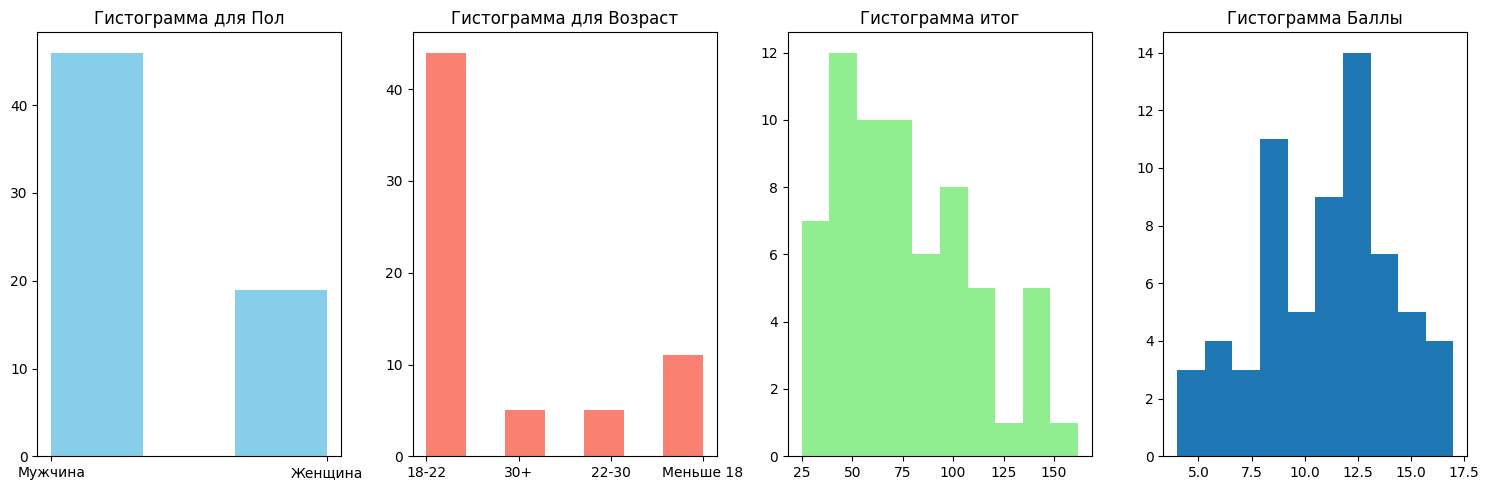

In [ ]:
import matplotlib.pyplot as plt

# Создание нескольких гистограмм рядом
plt.figure(figsize=(15, 5))

# Гистограмма для первой колонки
plt.subplot(1, 4, 1)  # 1 строка, 4 столбца, первая диаграмма
plt.hist(data['Пол'], bins=3, color='skyblue')
plt.title('Гистограмма для Пол')

# Гистограмма для второй колонки
plt.subplot(1, 4, 2)  # 1 строка, 4 столбца, вторая диаграмма
plt.hist(data['Возраст'], bins=7, color='salmon')
plt.title('Гистограмма для Возраст')

# Гистограмма для третьей колонки
plt.subplot(1, 4, 3)  # 1 строка, 4 столбца, третья диаграмма
plt.hist(data['итог'], bins=10, color='lightgreen')
plt.title('Гистограмма итог')

# Гистограмма для 4 колонки
plt.subplot(1, 4, 4)
plt.hist(data['Баллы'], bins=10)
plt.title('Гистограмма Баллы')

plt.tight_layout()
plt.show()


<Axes: >

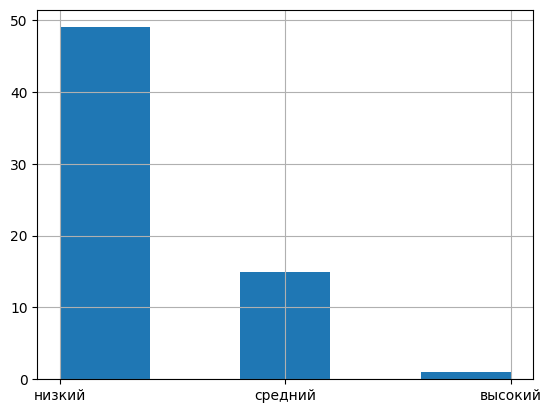

In [ ]:
display(data['стресс'].hist(bins=5))



In [ ]:
data['Команда'].value_counts()

Команда
10 класс                                       4
129                                            3
Decidium                                       3
21familyteam                                   3
Угарашечки по кайфу                            3
Чапаевская                                     2
102                                            2
Бригада                                        2
А                                              2
Шукрия                                         2
112                                            2
10 касс                                        1
Н3                                             1
10 класс                                       1
Команда                                        1
Ронпрог                                        1
113                                            1
10                                             1
прохожу одна                                   1
129 группа                                     1
Нейрон      

### Предобработка

In [ ]:

# Кодирование категориальных признаков
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column].astype(str))

In [ ]:
data.head(3)

,Отметка времени,Как бы вы оценили свою принадлежность к группе?\n,"Перешли бы вы в другую группу, если бы представилась такая возможность (без изменения прочих условий)?\n\n",Каковы взаимоотношения между членами вашей группы?\n,Каковы у вас взаимоотношения с руководством?\n,Каково отношение к делу (учебе и т.п.) в вашем коллективе?,Пол,Возраст,Баллы,Адрес электронной почты,Команда,Что Вы предпочитаете?,Какие книги вы предпочитаете читать?,Что Вы скорее можете допустить в работе?,Как Вы сходитесь с людьми?,Считаете ли Вы себя обидчивым?,"Склонны ли Вы хохотать, смеяться от души?",Считаете ли Вы себя:,Откровенны ли Вы или скрытны?,Любите ли Вы заниматься анализом своих переживаний?,"Находясь в обществе, Вы предпочитаете:",Часто ли Вы переживаете недовольство собой?,Любите ли Вы что-нибудь организовывать?,Хотелось бы Вам вести личный дневник?,Быстро ли Вы переходите от решения к исполнению?,Легко ли Вы меняете Ваше настроение?,"Любите ли Вы убеждать других, навязывать свои взгляды?",Ваши движения:,Вы сильно беспокоитесь о возможных неприятностях:,В затруднительных случаях:,"Если вы совершаете дурной поступок, то:",Я напряжен(а) и взволнован(а) (взвинчен),"У меня ком в горле, и (или) я ощущаю сухость во рту",Я перегружен(а) работой. Мне совсем не хватает времени,Я проглатываю пищу или забываю поесть,"После работы я не могу отключиться от мыслей о незавершенных делах, проблемах, планах; я «застреваю» на переживаниях рабочих ситуаций и нерешенных вопросов, обдумываю свои идеи снова и снова","Я чувствую себя одиноким(ой), изолированным(ой) и непонятым(ой)","Я страдаю от физического недомогания; у меня болит голова, напряжены мышцы шеи, боли в спине, спазмы в желудке","Я поглощен(а) мрачными мыслями, измучен(а) тревожными состояниями","Меня внезапно бросает то в жар, то в холод","Я взволнован(а), обеспокоен(а) или смущен(а)","Я забываю о встречах или делах, которые должен(а) сделать или решить","Я имею проблемы с пищеварением и с кишечником (боли, колики, расстройства или запоры)",Я легко могу заплакать,Я чувствую себя уставшим человеком,В трудной ситуации я крепко стискиваю зубы (или сжимаю кулаки),Я не спокоен / не спокойна,"Мне тяжело дышать, и (или) у меня внезапно перехватывает дыхание",Я легко пугаюсь; шум или шорох заставляет меня вздрагивать,"Мне необходимо более чем полчаса для того, чтобы заснуть","Я сбит(а) с толку; мои мысли спутаны; мне не хватает сосредоточенности, и я не могу сконцентрировать внимание",У меня усталый вид; мешки или круги под глазами,Я чувствую тяжесть на своих плечах,Я встревожен(а). Мне необходимо постоянно двигаться; я не могу устоять на одном месте,"Мне трудно контролировать свои поступки, эмоции, настроение или жесты",Я чувствую напряженность,итог,стресс
104,2024-02-28 18:53:37.147,3,5,2,3,3,1,0,9.0,4,32,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.0,1
105,2024-02-28 19:08:03.168,3,3,0,0,2,0,2,13.0,29,16,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,2.0,6.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,2.0,7.0,7.0,7.0,7.0,2.0,7.0,7.0,2.0,2.0,2.0,148.0,2
106,2024-03-11 00:01:51.917,5,4,2,0,2,0,0,12.0,17,19,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,7.0,7.0,2.0,2.0,2.0,6.0,7.0,2.0,5.0,3.0,4.0,5.0,7.0,5.0,2.0,4.0,3.0,6.0,1.0,4.0,8.0,4.0,4.0,3.0,3.0,106.0,2


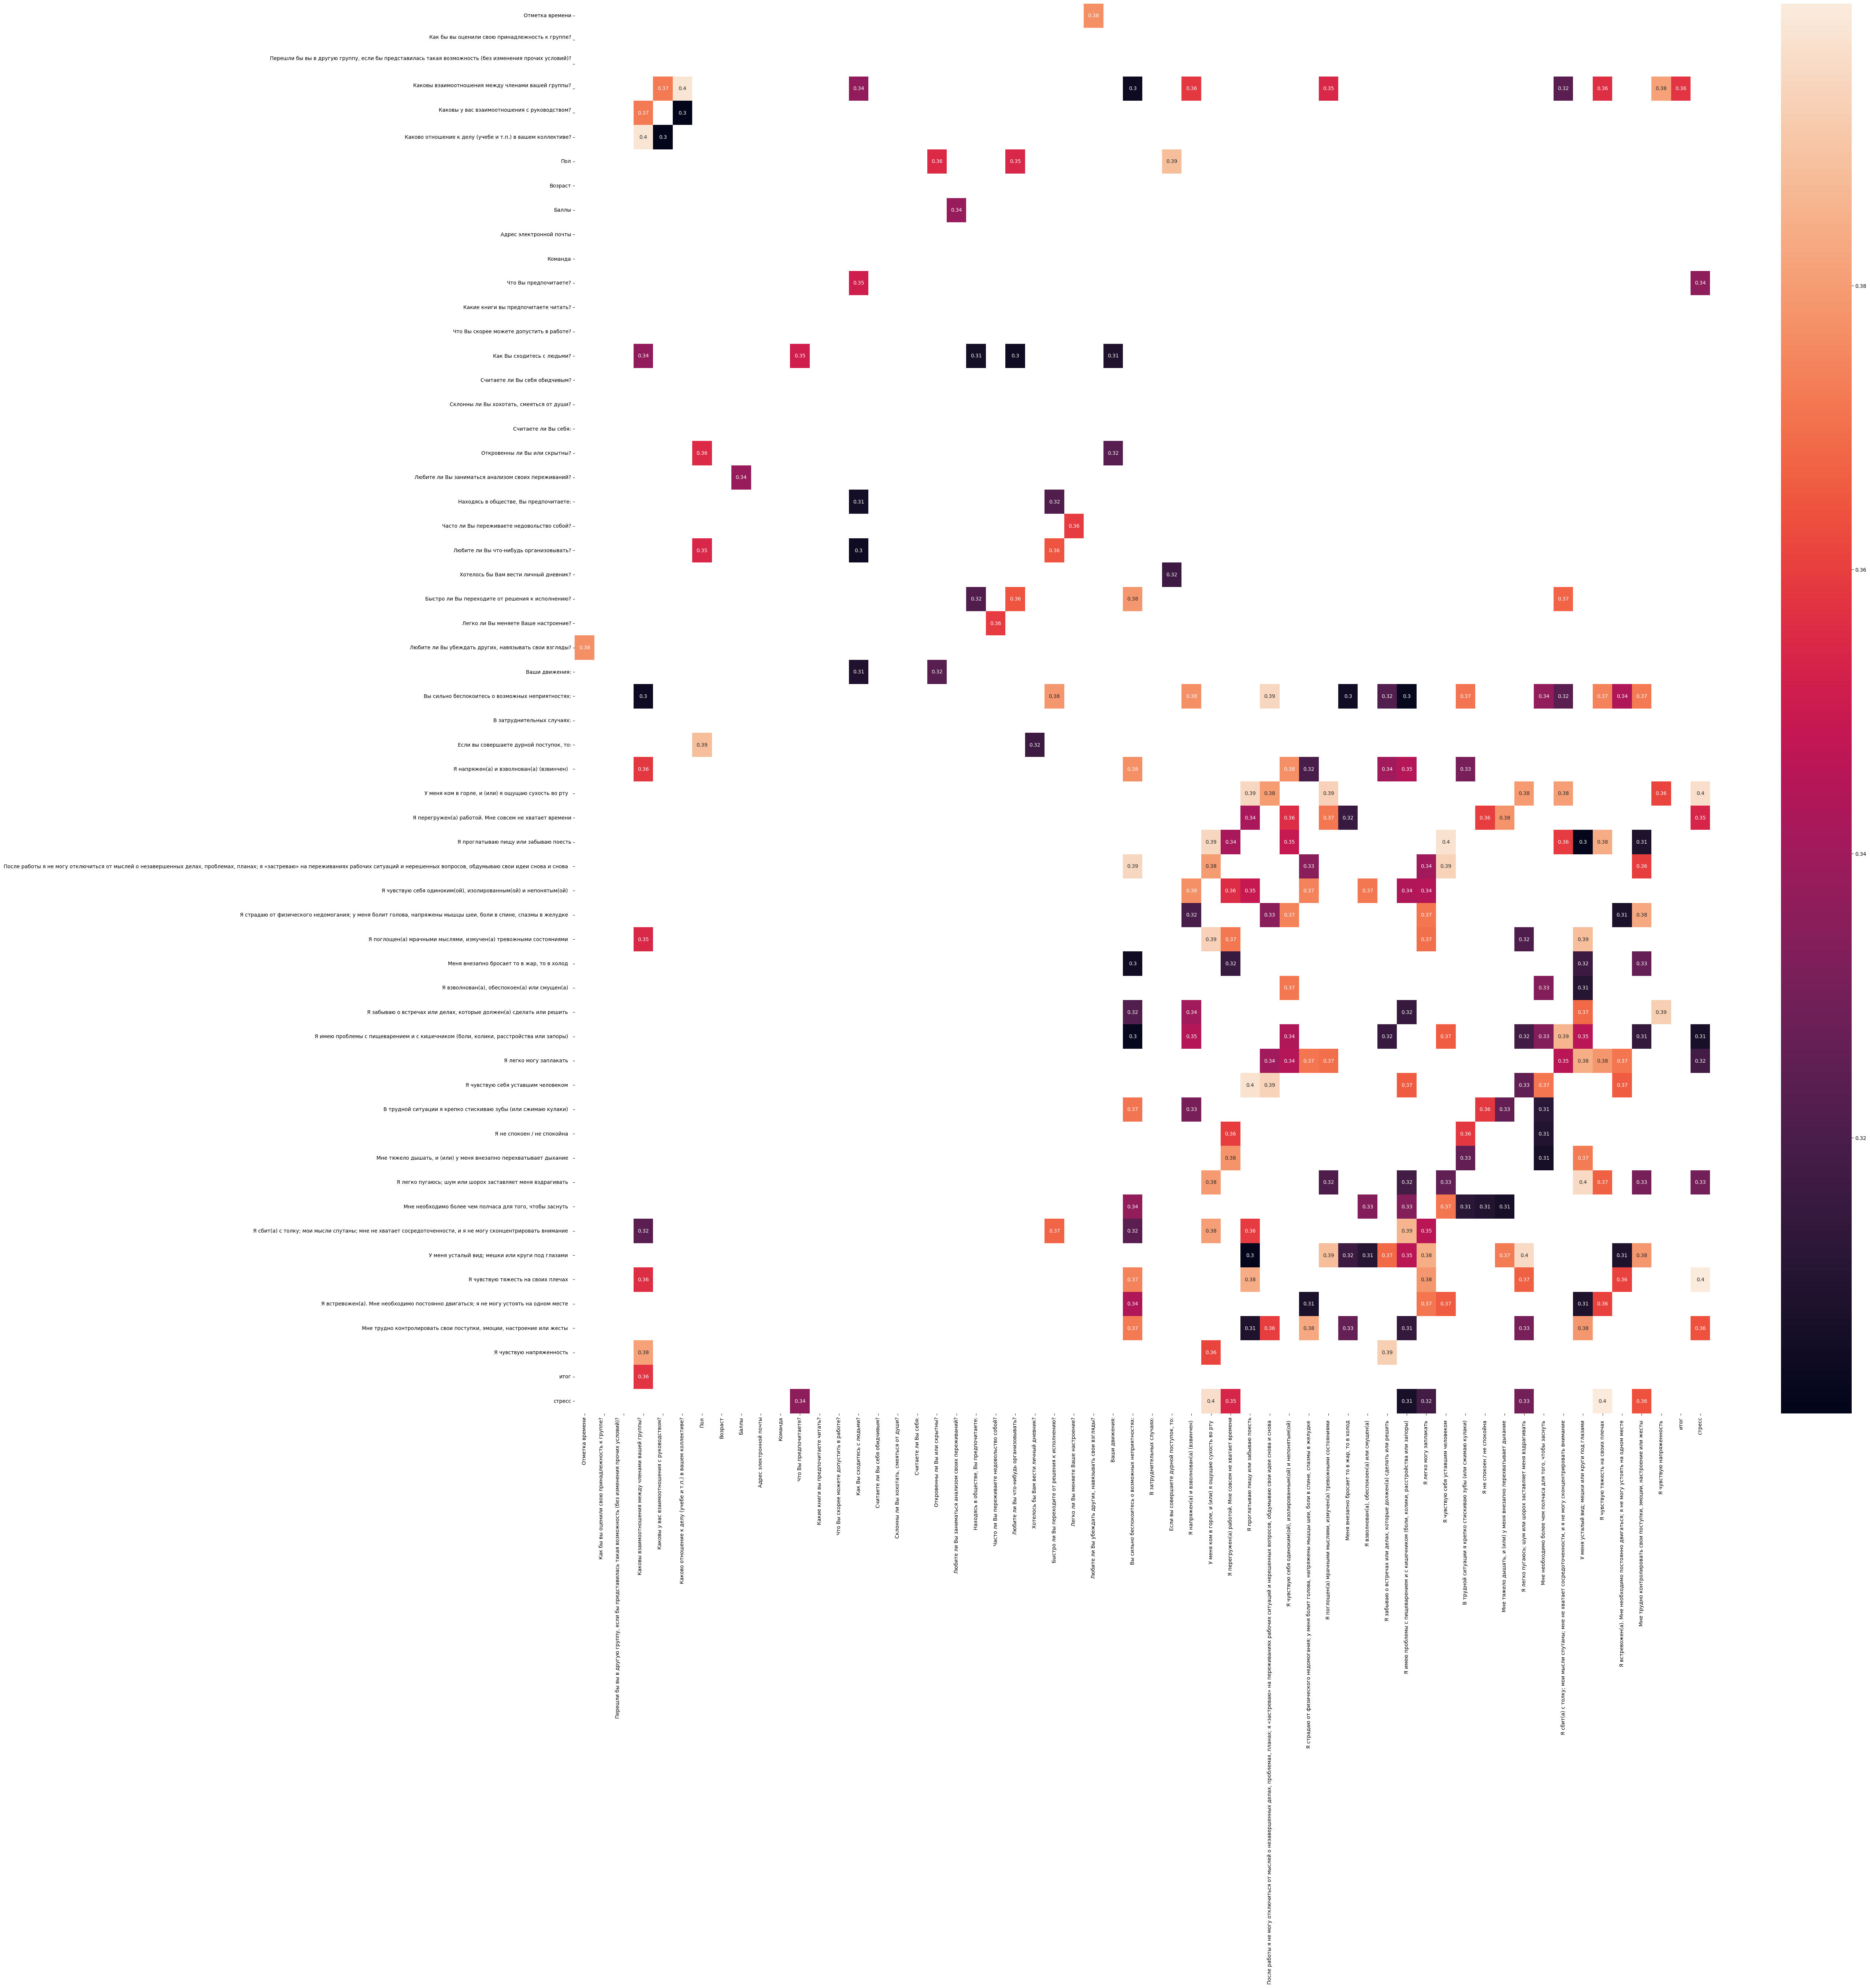

In [ ]:
corr_matrix = data.corr()
corr_matrix = corr_matrix[(corr_matrix > 0.3)&(corr_matrix<0.4)]
plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True)
plt.show()

баллы/итог/стреесс за таргет?

In [ ]:
data.groupby(['Пол', 'Если вы совершаете дурной поступок, то:']).size().reset_index(name='count')
#0 - woman, 1 - men
#0 - остро преживаете 1 - Острых переживаний нет

,Пол,"Если вы совершаете дурной поступок, то:",count
0,0,0,18
1,0,1,1
2,1,0,25
3,1,1,21


выбор тагрета

In [ ]:
data = data.drop(labels='Отметка времени', axis=1)

<ipython-input-293-c8c603cec4aa>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


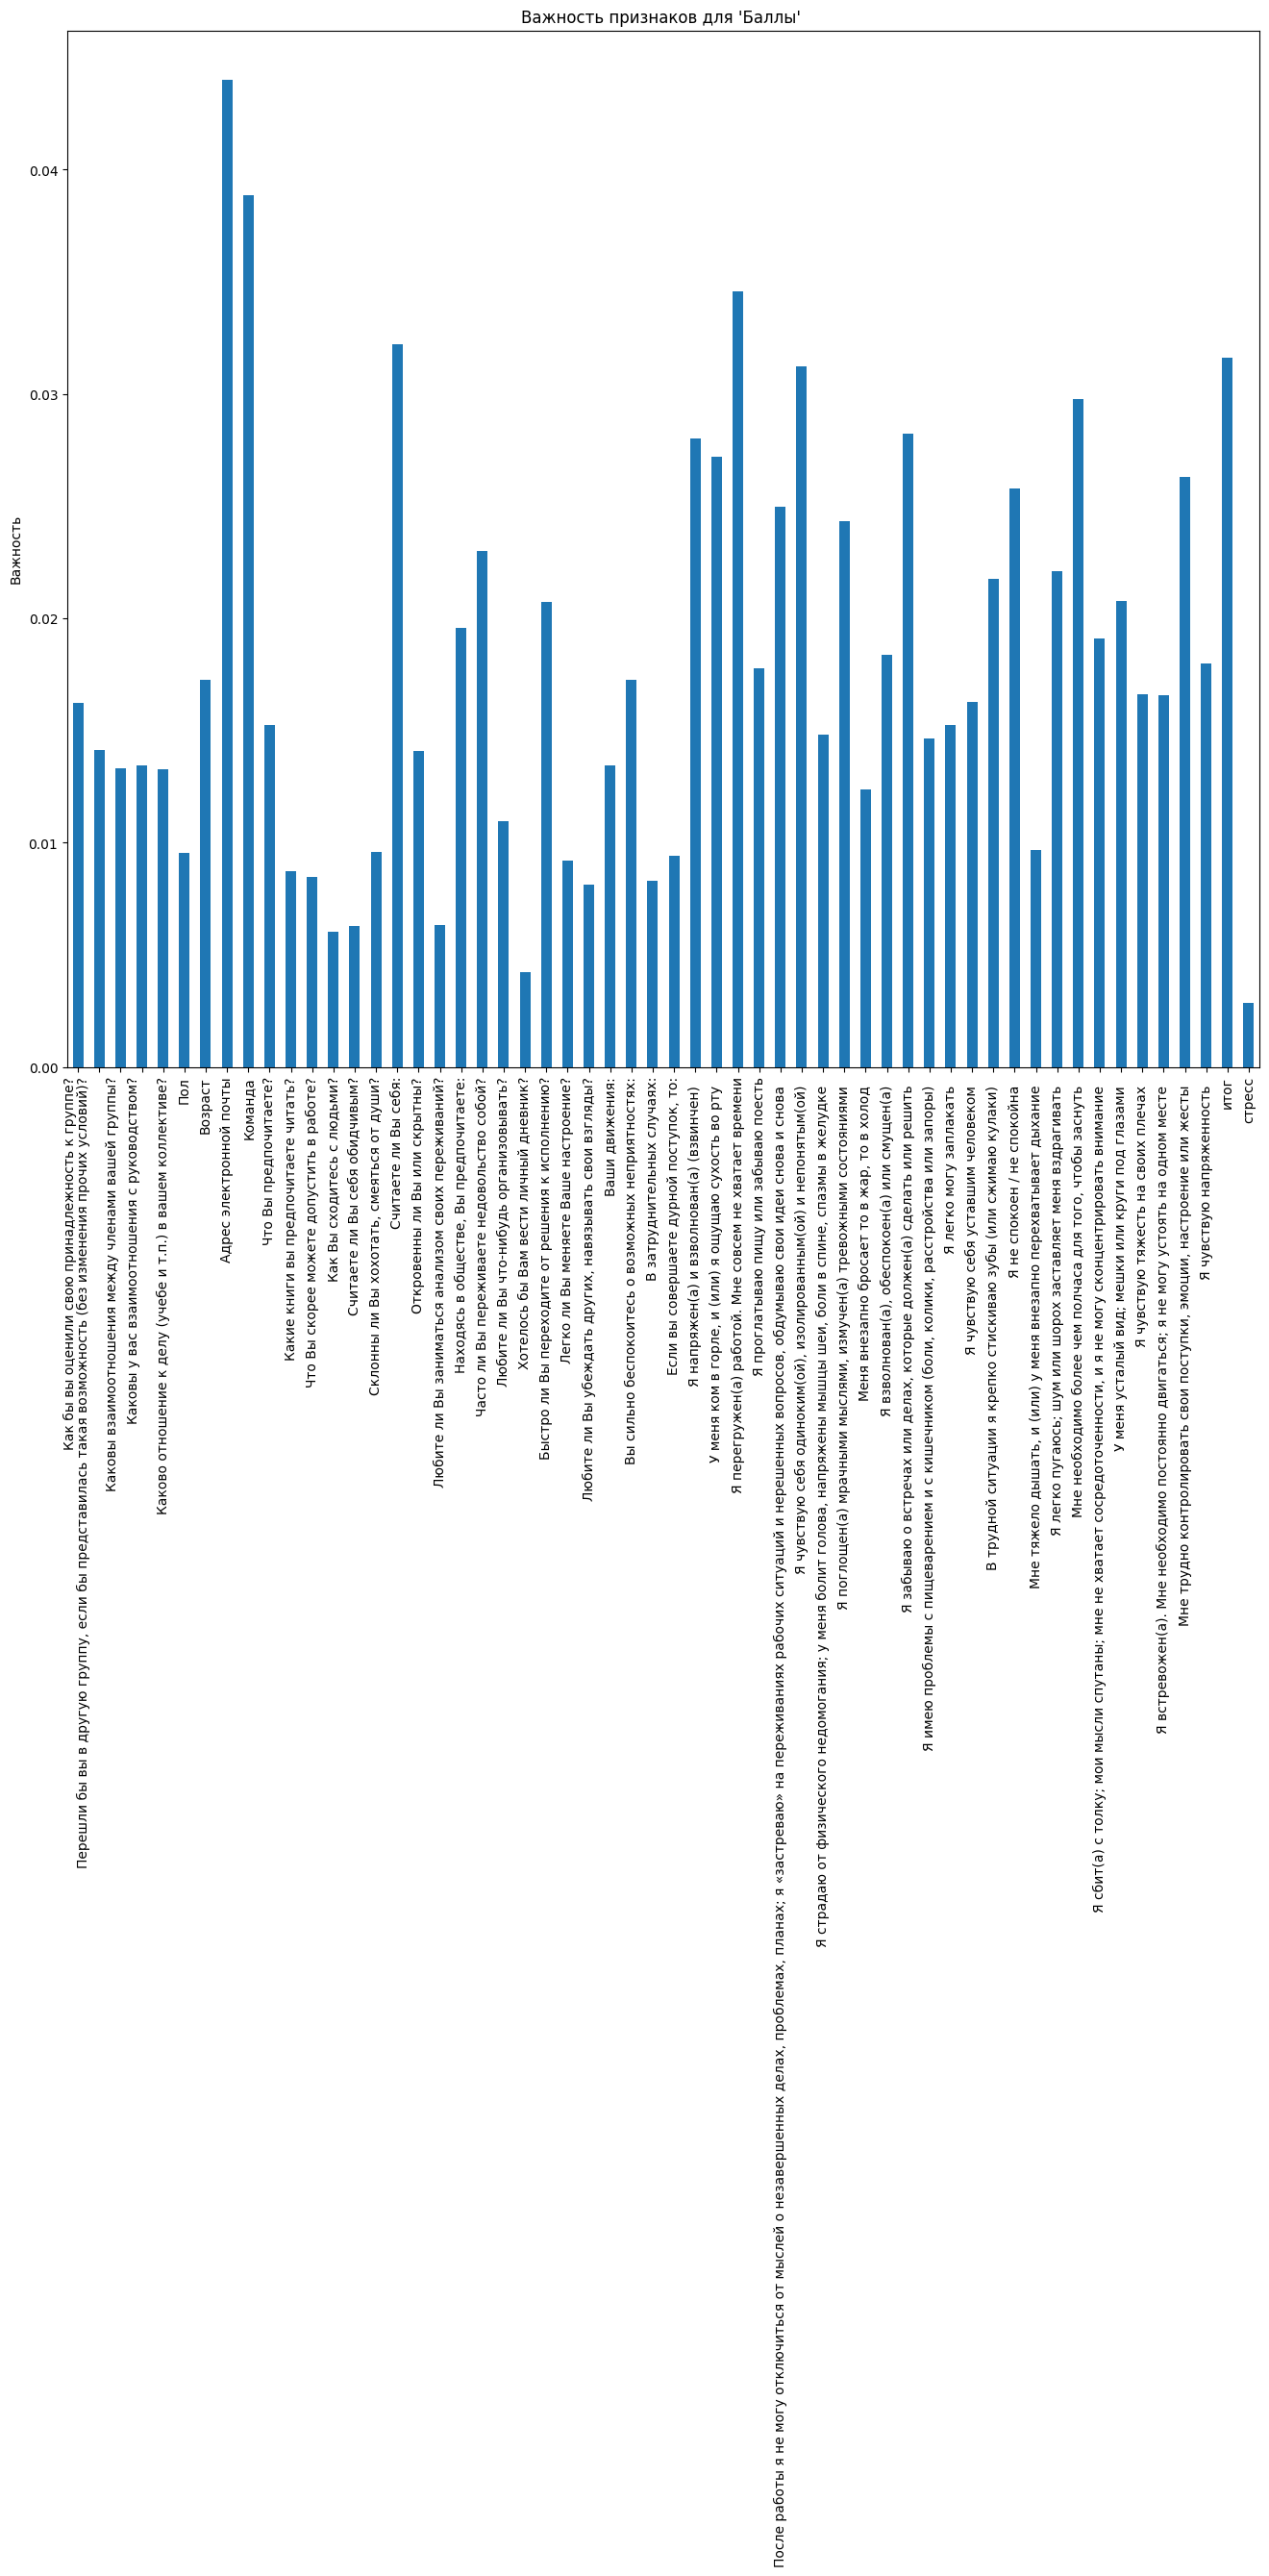

In [ ]:
model_skl_iris = RandomForestClassifier()
model_skl_iris.fit(X = data.drop(['Баллы'], axis=1),
                   y = data['Баллы'])

skl_iris_imp = pd.Series(model_skl_iris.feature_importances_,
                         data.drop(['Баллы'], axis=1).columns)

fig, ax = plt.subplots(figsize=(16,14))
skl_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков для 'Баллы' ")
ax.set_ylabel('Важность')
fig.tight_layout()

<ipython-input-294-752aeefb796c>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


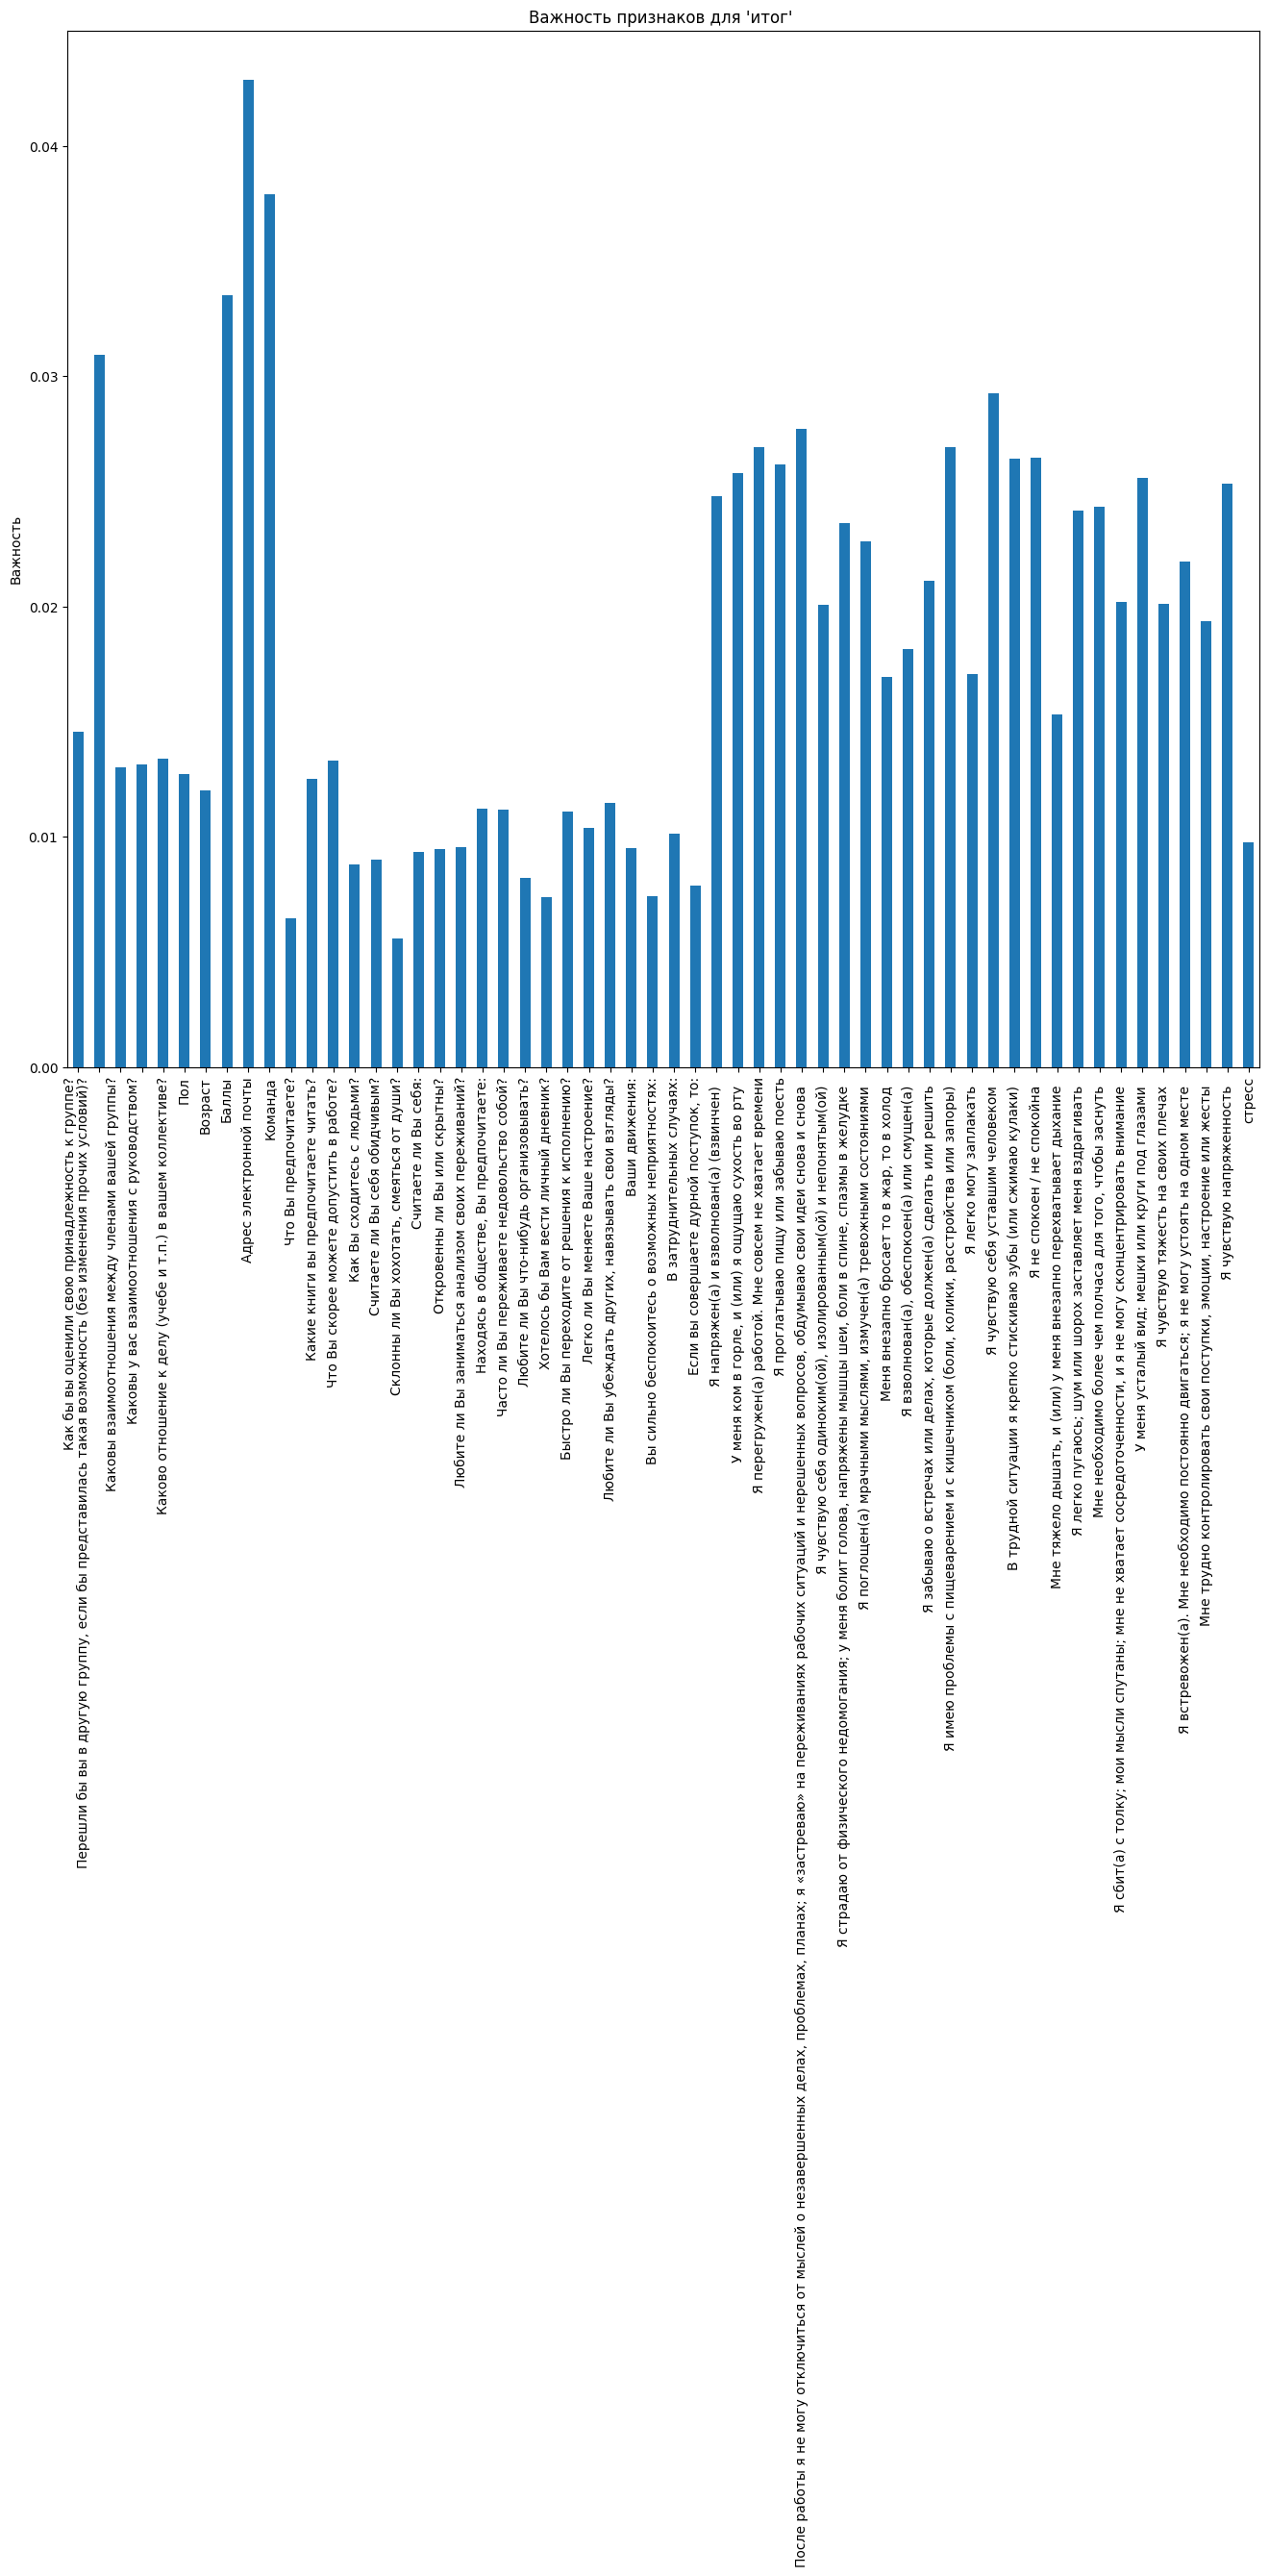

In [ ]:
model_skl_iris = RandomForestClassifier()
model_skl_iris.fit(X = data.drop(['итог'], axis=1),
                   y = data['итог'])

skl_iris_imp = pd.Series(model_skl_iris.feature_importances_,
                         data.drop(['итог'], axis=1).columns)

fig, ax = plt.subplots(figsize=(16,14))
skl_iris_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков для 'итог' ")
ax.set_ylabel('Важность')
fig.tight_layout()

"итог", тк зависимость от признака "Команда" выше, чем у "баллов"

### обучение

In [ ]:
#data = data.drop(labels='Адрес электронной почты', axis=1)

In [ ]:
import re
data = data.rename(columns = lambda x:re.sub('[^А-Яа-я0-9_]+', ' ', x))

In [ ]:
X = data.drop('итог', axis=1)
y = data['итог']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
data.head(3)

,Как бы вы оценили свою принадлежность к группе,Перешли бы вы в другую группу если бы представилась такая возможность без изменения прочих условий,Каковы взаимоотношения между членами вашей группы,Каковы у вас взаимоотношения с руководством,Каково отношение к делу учебе и т п в вашем коллективе,Пол,Возраст,Баллы,Адрес электронной почты,Команда,Что Вы предпочитаете,Какие книги вы предпочитаете читать,Что Вы скорее можете допустить в работе,Как Вы сходитесь с людьми,Считаете ли Вы себя обидчивым,Склонны ли Вы хохотать смеяться от души,Считаете ли Вы себя,Откровенны ли Вы или скрытны,Любите ли Вы заниматься анализом своих переживаний,Находясь в обществе Вы предпочитаете,Часто ли Вы переживаете недовольство собой,Любите ли Вы что нибудь организовывать,Хотелось бы Вам вести личный дневник,Быстро ли Вы переходите от решения к исполнению,Легко ли Вы меняете Ваше настроение,Любите ли Вы убеждать других навязывать свои взгляды,Ваши движения,Вы сильно беспокоитесь о возможных неприятностях,В затруднительных случаях,Если вы совершаете дурной поступок то,Я напряжен а и взволнован а взвинчен,У меня ком в горле и или я ощущаю сухость во рту,Я перегружен а работой Мне совсем не хватает времени,Я проглатываю пищу или забываю поесть,После работы я не могу отключиться от мыслей о незавершенных делах проблемах планах я застреваю на переживаниях рабочих ситуаций и нерешенных вопросов обдумываю свои идеи снова и снова,Я чувствую себя одиноким ой изолированным ой и непонятым ой,Я страдаю от физического недомогания у меня болит голова напряжены мышцы шеи боли в спине спазмы в желудке,Я поглощен а мрачными мыслями измучен а тревожными состояниями,Меня внезапно бросает то в жар то в холод,Я взволнован а обеспокоен а или смущен а,Я забываю о встречах или делах которые должен а сделать или решить,Я имею проблемы с пищеварением и с кишечником боли колики расстройства или запоры,Я легко могу заплакать,Я чувствую себя уставшим человеком,В трудной ситуации я крепко стискиваю зубы или сжимаю кулаки,Я не спокоен не спокойна,Мне тяжело дышать и или у меня внезапно перехватывает дыхание,Я легко пугаюсь шум или шорох заставляет меня вздрагивать,Мне необходимо более чем полчаса для того чтобы заснуть,Я сбит а с толку мои мысли спутаны мне не хватает сосредоточенности и я не могу сконцентрировать внимание,У меня усталый вид мешки или круги под глазами,Я чувствую тяжесть на своих плечах,Я встревожен а Мне необходимо постоянно двигаться я не могу устоять на одном месте,Мне трудно контролировать свои поступки эмоции настроение или жесты,Я чувствую напряженность,итог,стресс
104,3,5,2,3,3,1,0,9.0,4,32,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.0,1
105,3,3,0,0,2,0,2,13.0,29,16,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,2.0,6.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,2.0,7.0,7.0,7.0,7.0,2.0,7.0,7.0,2.0,2.0,2.0,148.0,2
106,5,4,2,0,2,0,0,12.0,17,19,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,7.0,7.0,2.0,2.0,2.0,6.0,7.0,2.0,5.0,3.0,4.0,5.0,7.0,5.0,2.0,4.0,3.0,6.0,1.0,4.0,8.0,4.0,4.0,3.0,3.0,106.0,2


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.0581917292318885


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('Коэффициент детерминации (R-squared):', r2)

Коэффициент детерминации (R-squared): 0.9999944626041884


In [ ]:
#функция sMAPE
def smape(a, f):
    return 1/len(a) * np.sum(np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

print(f'Cимметричная средняя абсолютная процентная ошибка (smape) для этой модели составляет: {round(smape(y_test, y_pred), 4)}%')

Cимметричная средняя абсолютная процентная ошибка (smape) для этой модели составляет: 0.0427%


In [ ]:
pickle.dump(model, open('model_leniar_reg.pkl', 'wb'))

На подумать

In [ ]:
print("Коэффициенты модели:")
temp = {}
for feature, coef in zip(X_train.columns, model.coef_):
    #print(f"{feature}: {coef}")
    temp.update({feature: coef})

temp

Коэффициенты модели:


{'Как бы вы оценили свою принадлежность к группе ': -0.0029930684506423444,
 'Перешли бы вы в другую группу если бы представилась такая возможность без изменения прочих условий ': -0.004144286849083967,
 'Каковы взаимоотношения между членами вашей группы ': -0.004201846683700938,
 'Каковы у вас взаимоотношения с руководством ': 0.013015150836450662,
 'Каково отношение к делу учебе и т п в вашем коллективе ': -0.009146184655574707,
 'Пол': -0.031169308310347976,
 'Возраст': 0.0014111239963537914,
 'Баллы': -0.0055153725640635365,
 'Адрес электронной почты': -2.945673144072458e-06,
 'Команда': 0.0010219392335943933,
 'Что Вы предпочитаете ': 0.023395309204324644,
 'Какие книги вы предпочитаете читать ': 0.004114405116517707,
 'Что Вы скорее можете допустить в работе ': 0.014518316794965916,
 'Как Вы сходитесь с людьми ': -0.01952342926974973,
 'Считаете ли Вы себя обидчивым ': 0.005936357614875654,
 'Склонны ли Вы хохотать смеяться от души ': -0.051466253206658416,
 'Считаете ли Вы себя 

In [ ]:
df = pd.DataFrame(list(temp.items()))

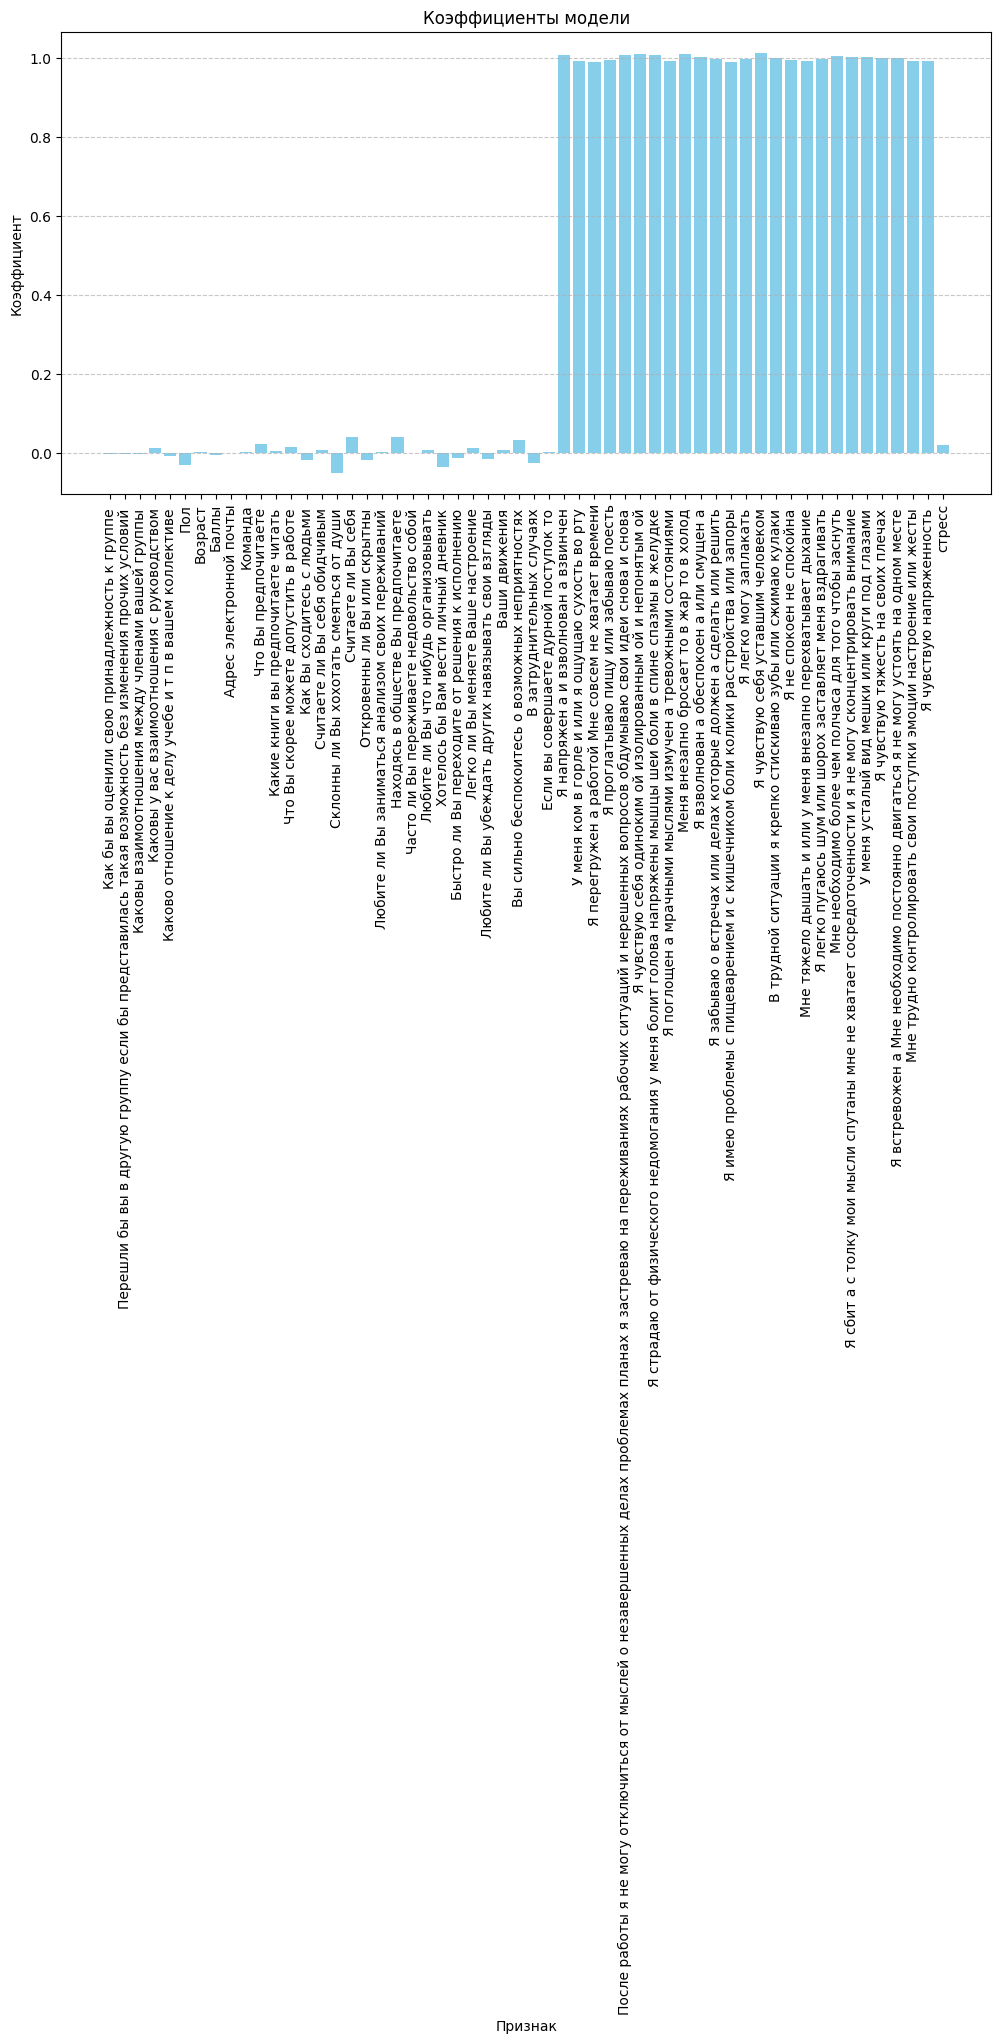

In [ ]:
# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
plt.bar(df[0], df[1], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Признак')
plt.ylabel('Коэффициент')
plt.title('Коэффициенты модели')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Отображение диаграммы
plt.show()